In [ ]:
!mkdir -p ~/.kaggle
!mv "/content/drive/MyDrive/kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Collect CREMA-D audio dataset from Kaggle into a folder called 'cremad'
!kaggle datasets download -d ejlok1/cremad --unzip -p cremad

# Collect RAVDESS audio dataset from Kaggle into a folder called 'ravdess'
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio --unzip -p ravdess

# Collect TESS audio dataset from Kaggle
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess --unzip

# Collect SAVEE audio dataset from Kaggle into a folder called 'savee'
!kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee --unzip -p savee

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 97% 437M/451M [00:03<00:00, 73.0MB/s]
100% 451M/451M [00:03<00:00, 133MB/s] 
Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 85% 366M/429M [00:00<00:00, 561MB/s]
100% 429M/429M [00:00<00:00, 516MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 423M/428M [00:00<00:00, 410MB/s]
100% 428M/428M [00:00<00:00, 488MB/s]
Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors
 80% 86.0M/107M [00:00<00:00, 859MB/s]
100% 107M/107M [00:00<00:00, 730MB/s] 


In [8]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
# This allows normalization for the specgrams which allows for clearer visualizations
from matplotlib.colors import Normalize
import seaborn as sns

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Put the ravdess directory in a list
ravdess = os.listdir('/content/drive/MyDrive/ravdess/audio_speech_actors_01-24/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the actor directories in audio_speech_actors_01-24
for dir in ravdess:
    # Loop through all the files in each directory
    for file in os.listdir('/content/drive/MyDrive/ravdess/audio_speech_actors_01-24/' + dir):
        # Extract the emotion label from the file name
        emotion = file.split('-')[2]
        if emotion == '01':
            emotion = 'neutral'
        elif emotion == '02':
            emotion = 'calm'
        elif emotion == '03':
            emotion = 'happiness'
        elif emotion == '04':
            emotion = 'sadness'
        elif emotion == '05':
            emotion = 'anger'
        elif emotion == '06':
            emotion = 'fear'
        elif emotion == '07':
            emotion = 'disgust'
        elif emotion == '08':
            emotion = 'surprise'
        else:
            emotion = 'Unknown'
        # Extract the path
        path = '/content/drive/MyDrive/ravdess/audio_speech_actors_01-24/' + dir + '/' + file
        # Append the emotion and path to their lists
        emotions.append(emotion)
        paths.append(path)

In [ ]:
ravdess_df = pd.DataFrame(emotions,columns=['Emotions'])
#
ravdess_df['Paths'] = paths
#
ravdess_df

,Emotions,Paths
0,calm,/content/drive/MyDrive/ravdess/audio_speech_ac...
1,calm,/content/drive/MyDrive/ravdess/audio_speech_ac...
2,sadness,/content/drive/MyDrive/ravdess/audio_speech_ac...
3,sadness,/content/drive/MyDrive/ravdess/audio_speech_ac...
4,fear,/content/drive/MyDrive/ravdess/audio_speech_ac...
...,...,...
1435,sadness,/content/drive/MyDrive/ravdess/audio_speech_ac...
1436,fear,/content/drive/MyDrive/ravdess/audio_speech_ac...
1437,anger,/content/drive/MyDrive/ravdess/audio_speech_ac...
1438,disgust,/content/drive/MyDrive/ravdess/audio_speech_ac...


In [ ]:
# Put the cremad directory in a list
cremad = os.listdir('/content/drive/MyDrive/cremad/AudioWAV/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the files and extract the emotion label and path
for file in cremad:
    # Extract the emotion label from the file name
    emotion = file.split('_')[2]
    if emotion == 'SAD':
        emotion = 'sadness'
    elif emotion == 'ANG':
        emotion = 'anger'
    elif emotion == 'DIS':
        emotion = 'disgust'
    elif emotion == 'FEA':
        emotion = 'fear'
    elif emotion == 'HAP':
        emotion = 'happiness'
    elif emotion == 'NEU':
        emotion = 'neutral'
    elif emotion == 'SUR':
        emotion = 'surprise'
    else:
        emotion = 'Unknown'
    # Extract the path
    path = '/content/drive/MyDrive/cremad/AudioWAV/' + file
    # Append the emotion and path to their lists
    emotions.append(emotion)
    paths.append(path)

In [ ]:
cremad_df = pd.DataFrame(emotions, columns = ['Emotions'])

In [ ]:
cremad_df['Paths'] = paths

In [ ]:
cremad_df.head()

,Emotions,Paths
0,anger,/content/drive/MyDrive/cremad/AudioWAV/1022_IW...
1,fear,/content/drive/MyDrive/cremad/AudioWAV/1051_DF...
2,happiness,/content/drive/MyDrive/cremad/AudioWAV/1025_IW...
3,anger,/content/drive/MyDrive/cremad/AudioWAV/1022_IW...
4,sadness,/content/drive/MyDrive/cremad/AudioWAV/1090_TA...


In [ ]:
savee= os.listdir('/content/drive/MyDrive/savee/ALL/')

emotions = []
paths = []

for file in savee:
    emotion = file.split('.')[0]
    emotion = emotion.split('_')[1]
    emotion = emotion[:-2]
    if emotion == 'a':
      emotion = 'anger'
    elif emotion == 'd':
        emotion = 'disgust'
    elif emotion == 'f':
        emotion = 'fear'
    elif emotion == 'h':
        emotion = 'happiness'
    elif emotion == 'n':
        emotion = 'neutral'
    elif emotion == 'sa':
        emotion = 'sadness'
    elif emotion == 'su':
        emotion = 'surprise'
    else:
        emotion = 'Unknown'
    emotions.append(emotion)
    path = '/content/drive/MyDrive/savee/ALL/' + file
    paths.append(path)

In [ ]:
savee_df = pd.DataFrame(emotions, columns = ['Emotions'])

In [ ]:
savee_df['Paths'] = paths

In [ ]:
# Put the tess directory in a list
tess = os.listdir('/content/drive/MyDrive/TESS Toronto emotional speech set data/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the audio file directories
for dir in tess:
    # Loop through all the files in each directory
    for file in os.listdir('/content/drive/MyDrive/TESS Toronto emotional speech set data/' + dir):
        # Extract the emotion label from the file name
        emotion = file.split('.')[0]
        emotion = emotion.split('_')[2]
        if emotion == 'ps':
            emotion = 'surprise'
        elif emotion == 'sad':
            emotion = 'sadness'
        elif emotion == 'disgust':
            emotion = 'disgust'
        elif emotion == 'angry':
            emotion = 'anger'
        elif emotion == 'happy':
            emotion = 'happiness'
        elif emotion == 'neutral':
            emotion = 'neutral'
        elif emotion == 'fear':
            emotion = 'fear'
        else:
            emotion = 'Unknown'
        # Extract the path
        path = '/content/drive/MyDrive/TESS Toronto emotional speech set data/' + dir + '/' + file
        # Append the emotion and path to their lists
        emotions.append(emotion)
        paths.append(path)

In [ ]:
tess_df = pd.DataFrame(emotions, columns = ['Emotions'])

In [ ]:
tess_df['Paths'] = paths

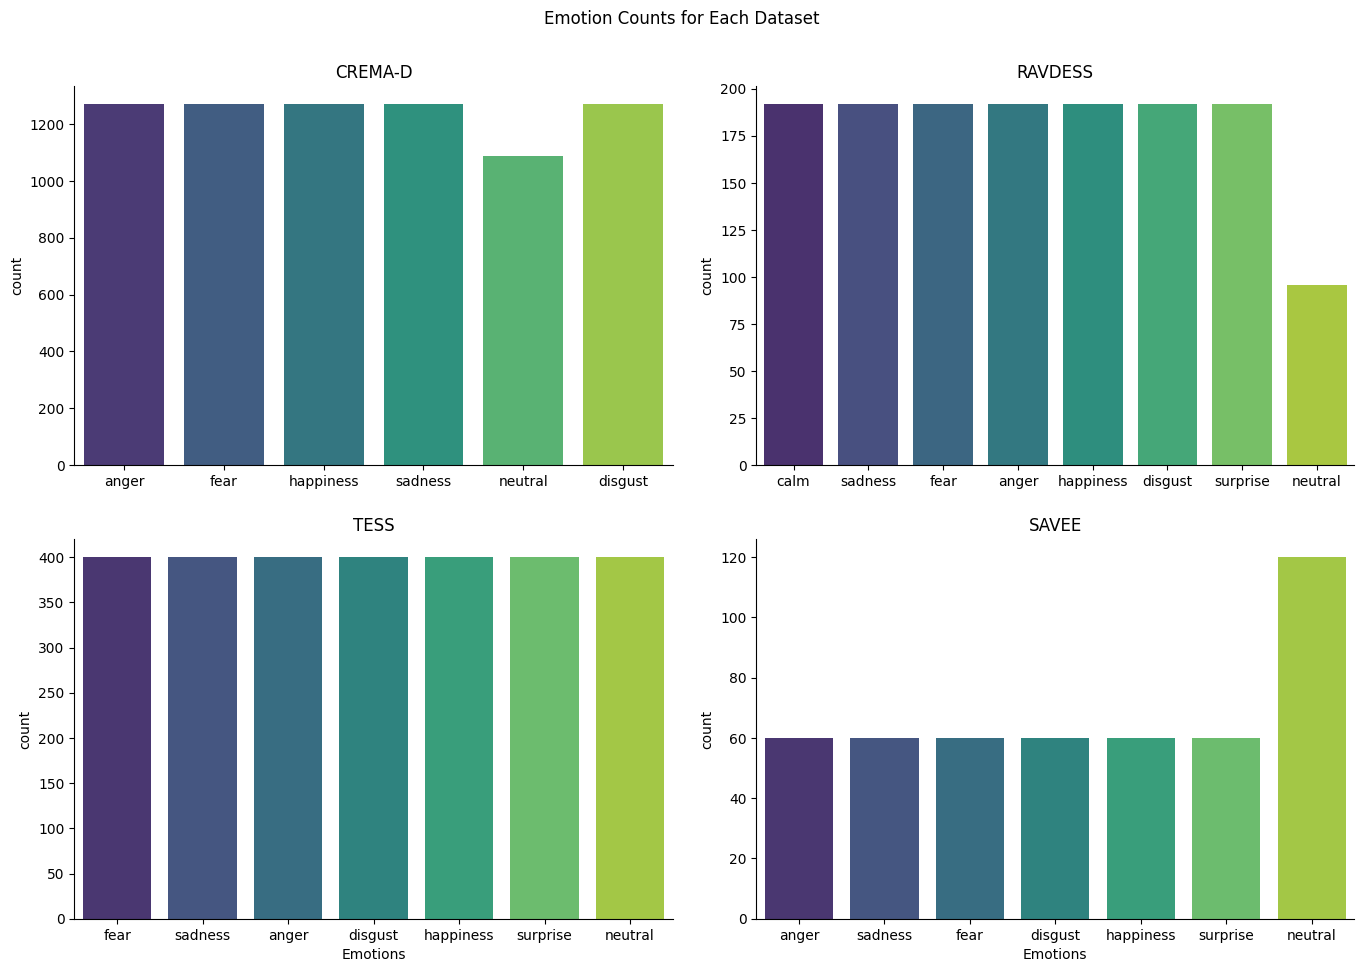

In [ ]:

# Plot the value counts for each emotion in each dataset
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.countplot(cremad_df, x = cremad_df['Emotions'], palette='viridis')
plt.title('CREMA-D')
plt.xlabel('')
plt.subplot(2, 2, 2)
sns.countplot(ravdess_df, x = ravdess_df['Emotions'], palette='viridis')
plt.title('RAVDESS')
plt.xlabel('')
plt.subplot(2, 2, 3)
sns.countplot(tess_df, x = tess_df['Emotions'], palette='viridis')
plt.title('TESS')
plt.subplot(2, 2, 4)
sns.countplot(savee_df, x = savee_df['Emotions'], palette='viridis')
plt.title('SAVEE')
plt.suptitle('Emotion Counts for Each Dataset')
# Adjust the layout so there are no overlapping titles
plt.tight_layout(pad=2)
# Remove the spines
sns.despine()
plt.show()

In [ ]:
# Count the number of emotions in each dataset
print('CREMA-D Emotion Counts:')
print(cremad_df['Emotions'].value_counts())
print('\nRAVDESS Emotion Counts:')
print(ravdess_df['Emotions'].value_counts())
print('\nTESS Emotion Counts:')
print(tess_df['Emotions'].value_counts())
print('\nSAVEE Emotion Counts:')
print(savee_df['Emotions'].value_counts())

CREMA-D Emotion Counts:
Emotions
anger        1271
fear         1271
happiness    1271
sadness      1271
disgust      1271
neutral      1087
Name: count, dtype: int64

RAVDESS Emotion Counts:
Emotions
calm         192
sadness      192
fear         192
anger        192
happiness    192
disgust      192
surprise     192
neutral       96
Name: count, dtype: int64

TESS Emotion Counts:
Emotions
fear         400
sadness      400
anger        400
disgust      400
happiness    400
surprise     400
neutral      400
Name: count, dtype: int64

SAVEE Emotion Counts:
Emotions
neutral      120
sadness       60
anger         60
fear          60
disgust       60
happiness     60
surprise      60
Name: count, dtype: int64


In [ ]:
df = pd.concat([cremad_df, ravdess_df, tess_df, savee_df], axis = 0)

In [ ]:
df.head()

,Emotions,Paths
0,anger,/content/drive/MyDrive/cremad/AudioWAV/1022_IW...
1,fear,/content/drive/MyDrive/cremad/AudioWAV/1051_DF...
2,happiness,/content/drive/MyDrive/cremad/AudioWAV/1025_IW...
3,anger,/content/drive/MyDrive/cremad/AudioWAV/1022_IW...
4,sadness,/content/drive/MyDrive/cremad/AudioWAV/1090_TA...


In [ ]:
df['Emotions'].value_counts()

,count
Emotions,
anger,1923
fear,1923
happiness,1923
sadness,1923
disgust,1923
neutral,1703
surprise,652
calm,192


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12162 entries, 0 to 479
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotions  12162 non-null  object
 1   Paths     12162 non-null  object
dtypes: object(2)
memory usage: 285.0+ KB


In [ ]:
df.isna().sum()

,0
Emotions,0
Paths,0


In [ ]:
df = df[df['Emotions'] !='calm']

In [ ]:
df.shape

(11970, 2)

In [ ]:
df.reset_index(inplace = True, drop = True)

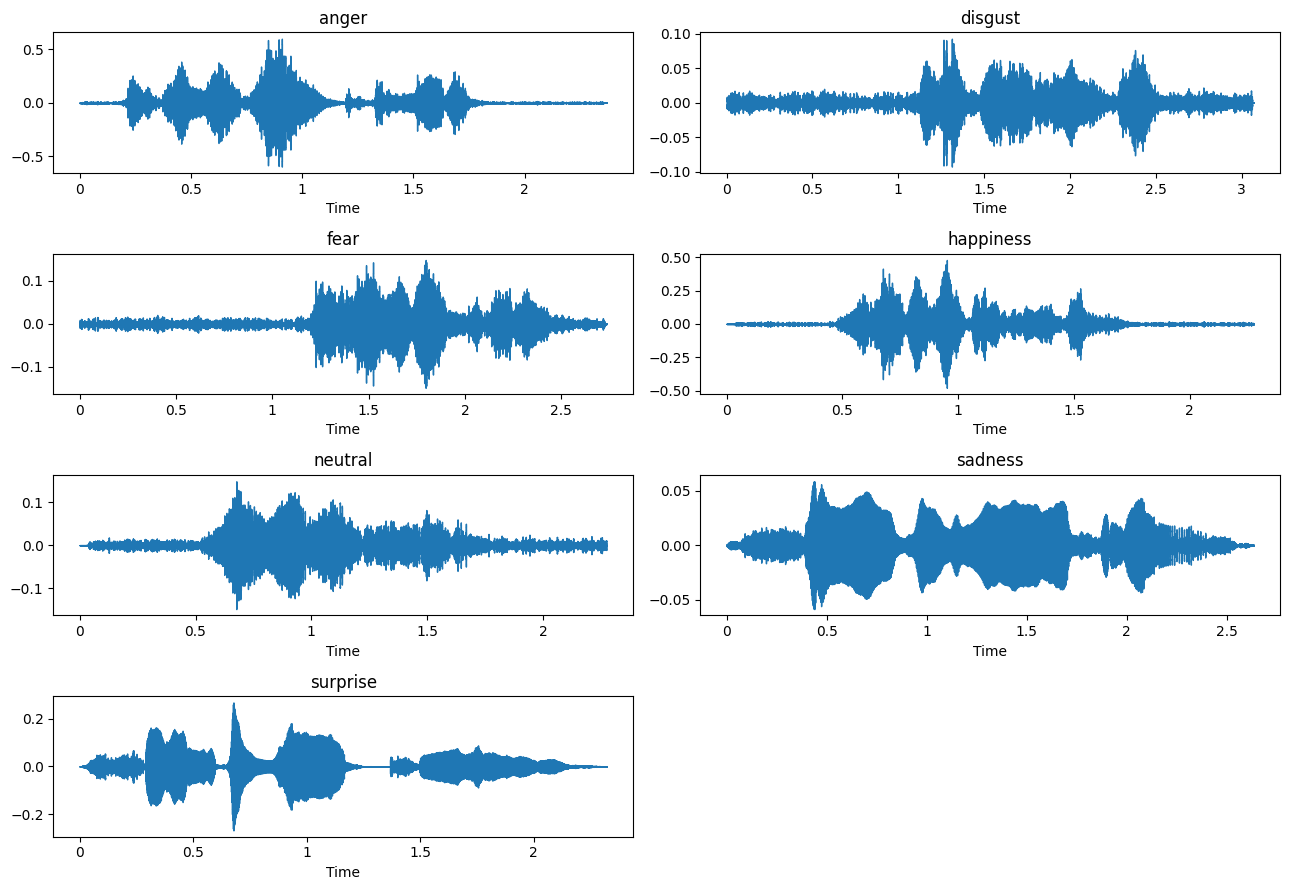

In [ ]:
sample = df.groupby('Emotions',group_keys = False).apply(lambda x: x.sample(1))

sample_path = sample['Paths'].tolist()

plt.figure(figsize = (13,9))
for i in range(7):
  plt.subplot(4,2,i+1)
  y,sr = librosa.load(sample_path[i],sr = 44100)
  librosa.display.waveshow(y, sr = sr)
  plt.title(sample['Emotions'].values[i])
plt.tight_layout()

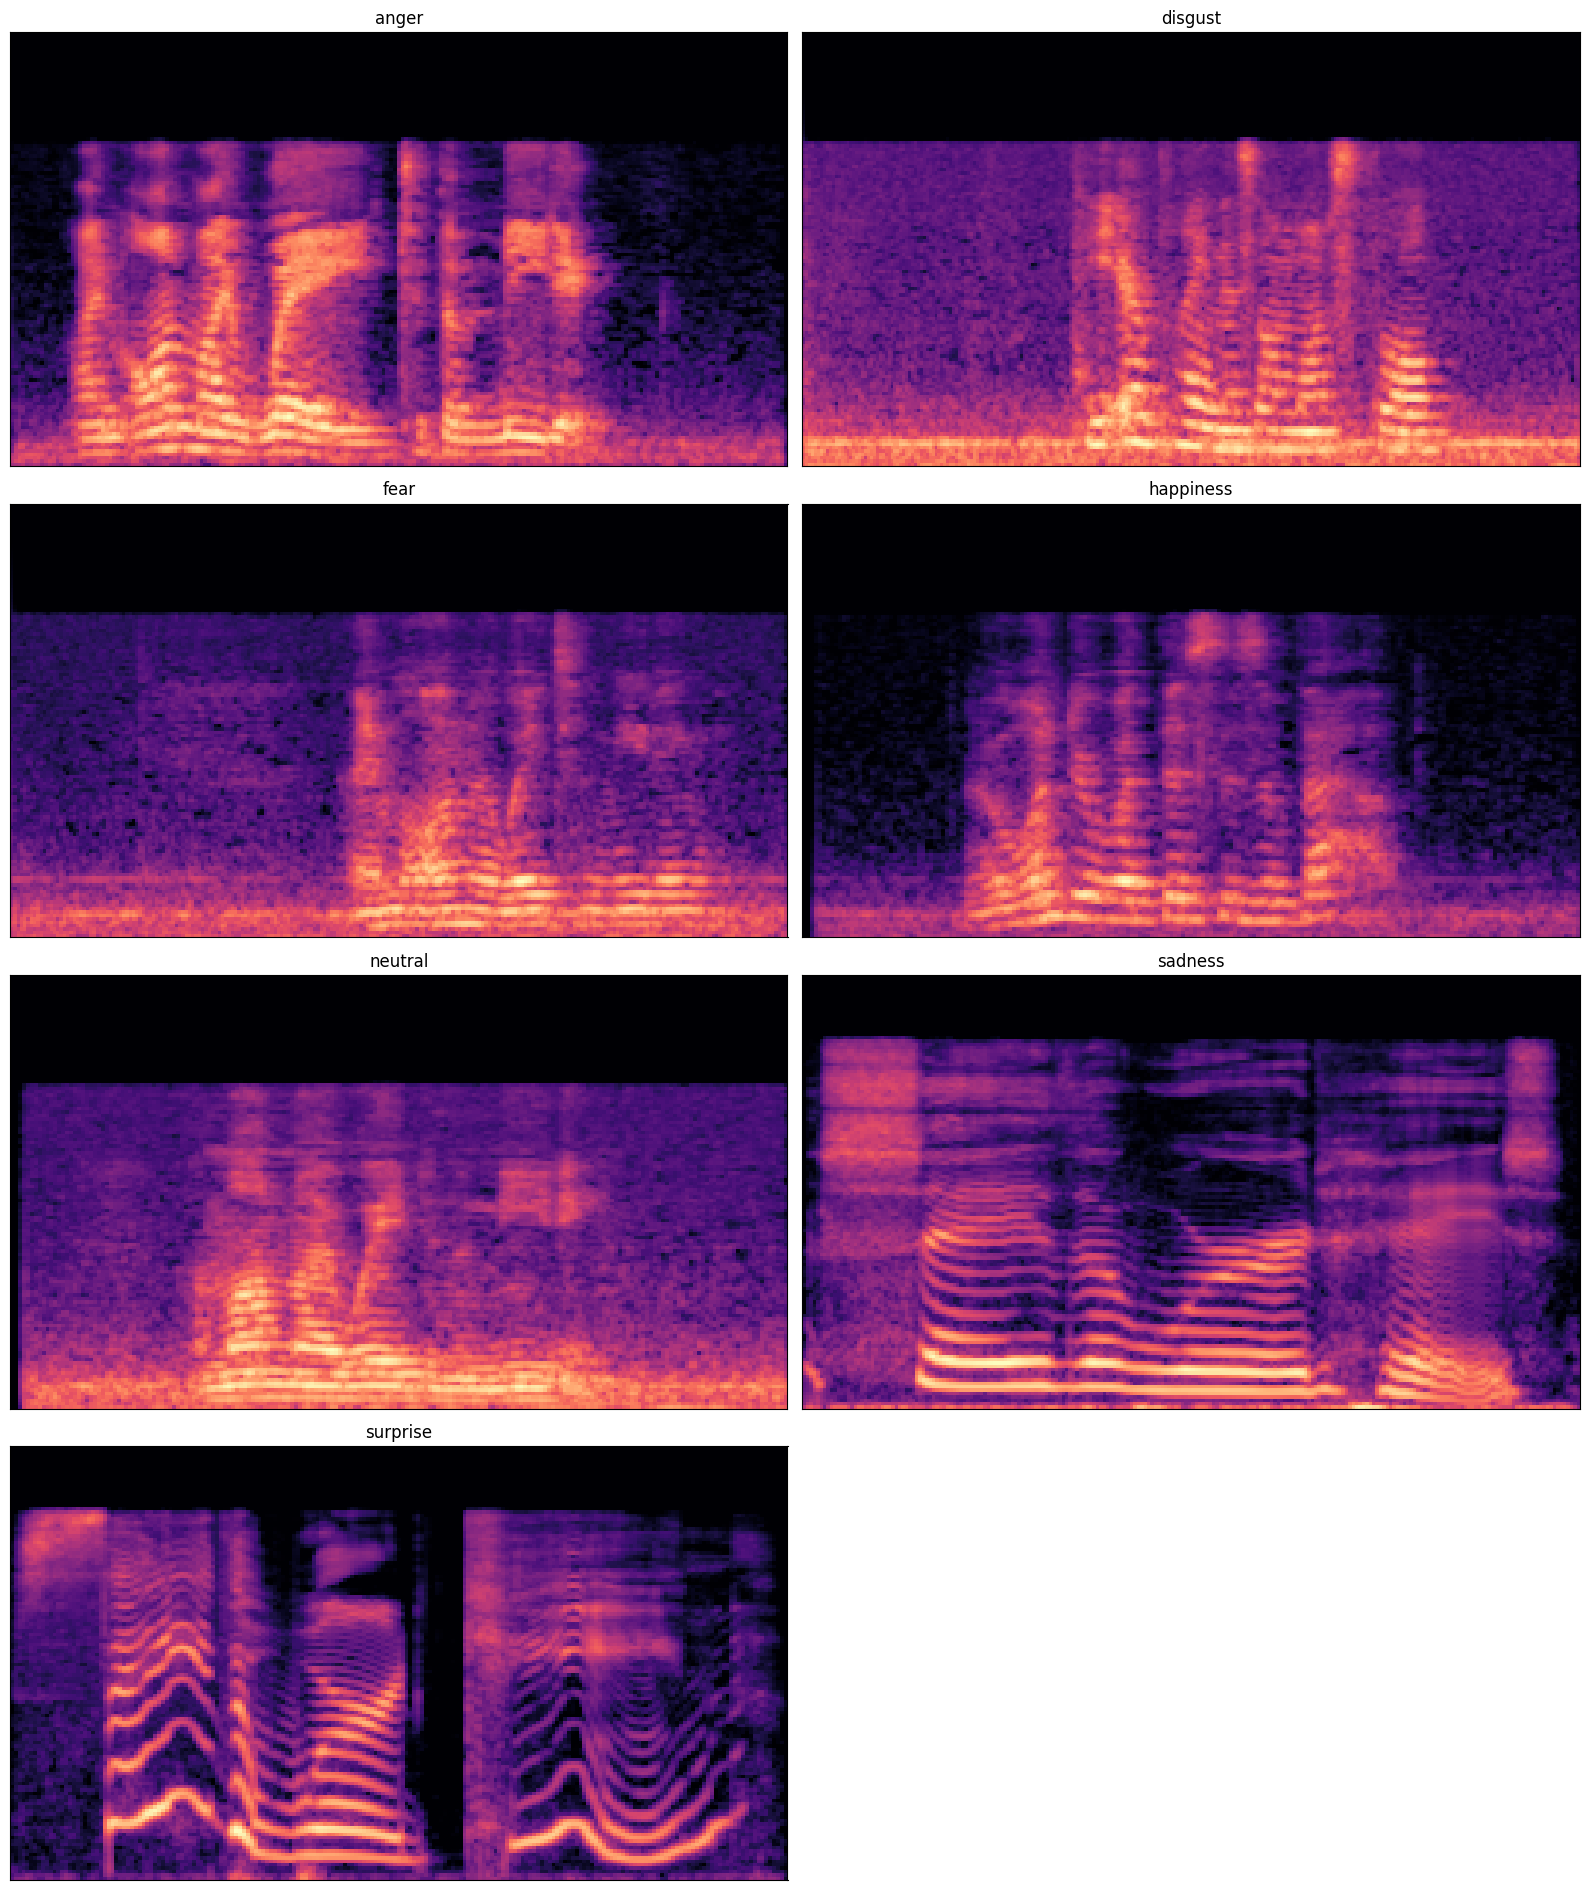

In [ ]:
plt.figure(figsize = (16,9))
for i in range(7):
  plt.subplot(4,2,i+1)
  signal,sr = librosa.load(sample_path[i],sr = 44100)
  signal = librosa.feature.melspectrogram(y = signal, sr=sr)
  mel_fcc = librosa.power_to_db(signal,ref = np.min)
  librosa.display.specshow(mel_fcc, sr = sr)
  plt.title(sample['Emotions'].values[i])
plt.tight_layout()

In [ ]:
# Encode the emotion labels into numbers
encoder = LabelEncoder()
df['Emotion'] = encoder.fit_transform(df['Emotion'])
# Make sure the encoding worked
df['Emotion'].value_counts()

In [ ]:
def process_audio(path):
    '''
    Load the audio file, convert the audio file into a mel spectrogram,
    return the mel spectrogram as an image, and convert the image into a numpy array
    '''
    # Load the audio file and set the sampling rate to 44100
    audio, sr = librosa.load(path, sr=44100, duration=4, mono=True)
    # pad the audio files that are less than 4 seconds with zeros at the end
    if len(audio) < 4 * sr:
        audio = np.pad(audio, pad_width=(0, 4 * sr - len(audio)), mode='constant')
    # Convert the audio file into a mel spectrogram
    signal = librosa.feature.melspectrogram(y = audio, sr=sr, n_mels=128)
    # Convert the spectrogram from amplitude squared to decibels
    # as amplitude does not give us much information
    signal = librosa.power_to_db(signal, ref=np.min)    # Convert the image into a numpy array
    image = np.array(signal)
    # Return the image
    return image

In [ ]:
image = process_audio(sample_paths[6])
# Print the shape of the numpy array
print('Numpy array shape:', image.shape)
# Plot the image
plt.figure(figsize=(12, 4))
librosa.display.specshow(image, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [1]:
# Divide the data into features and labels
X_mel = [process_audio(path) for path in df['Path']]
y_mel = df['Emotion']

In [9]:
X_mel = np.load('/content/drive/MyDrive/X_mel.npy')

In [10]:
y_mel = np.load('/content/drive/MyDrive/y_mel.npy')

In [11]:
print("len of X_mel, ",len(X_mel))
print("len of y_mel, ",len(y_mel))


len of X_mel,  11970
len of y_mel,  11970


In [12]:
X_train, X_test, y_train, y_test= train_test_split(X_mel, y_mel, test_size=0.2, random_state=42, shuffle = True)

In [13]:
print("Len of X_train ", len(X_train))
print("Len of X_train ", len(X_test))

Len of X_train  9576
Len of X_train  2394


In [14]:
X_train.shape

(9576, 128, 345)

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [16]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [19]:
X_train.shape

(9576, 128, 345, 1)

In [20]:
batch_size = 32
# Make a training dataset from the training set
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# Shuffle, batch, and prefetch the data
train_ds = train_ds.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# Make a testing dataset from the testing set
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
# Shuffle, batch, and prefetch the data
test_ds = test_ds.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [17]:
model_mel = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 345, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Batch normalization maintains the 0 mean and 1 standard deviation
    tf.keras.layers.BatchNormalization(),
    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Global average pooling layer averages the values in each feature map into
    # a single value and flattens the result into a (None, 256) array
    tf.keras.layers.GlobalAveragePooling2D(),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [24]:
model_mel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10, restore_best_weights=True, mode = 'min')

In [28]:
lr_scheular = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,min_lr = 0.000001,mode = 'min')

In [30]:
histor = model_mel.fit(train_ds,epochs = 30,validation_data = test_ds,callbacks = [early_stopping,lr_scheular])

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.9022 - loss: 0.3139 - val_accuracy: 0.6788 - val_loss: 0.8954 - learning_rate: 1.0000e-04
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.9170 - loss: 0.2924 - val_accuracy: 0.6846 - val_loss: 0.8834 - learning_rate: 1.0000e-04
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9296 - loss: 0.2653 - val_accuracy: 0.6792 - val_loss: 0.9056 - learning_rate: 1.0000e-04
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9355 - loss: 0.2482 - val_accuracy: 0.6767 - val_loss: 0.9083 - learning_rate: 1.0000e-04
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9465 - loss: 0.2291 - val_accuracy: 0.6850 - val_loss: 0.8931 - learning_rate: 1.0000e-04
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9484 - loss: 0.2167 - val_accuracy: 0.6767 - val_loss: 0.9396 - learning_rate: 1.0000e-04
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/ste

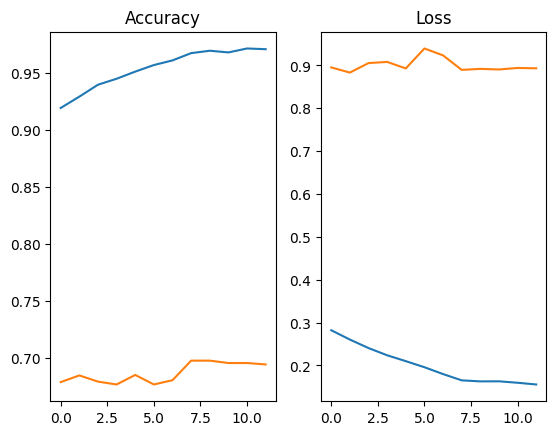

In [33]:
plt.subplot(1,2,1)
plt.plot(histor.history['accuracy'])
plt.plot(histor.history['val_accuracy'])
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(histor.history['loss'])
plt.plot(histor.history['val_loss'])
plt.title("Loss")

plt.show()

In [34]:
y_pred = model_mel.predict(X_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


In [36]:
y_pred = np.argmax(y_pred,axis = 1)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       398
           1       0.59      0.74      0.66       417
           2       0.62      0.68      0.65       396
           3       0.66      0.64      0.65       357
           4       0.82      0.56      0.67       336
           5       0.64      0.66      0.65       381
           6       0.93      0.83      0.88       109

    accuracy                           0.68      2394
   macro avg       0.73      0.70      0.71      2394
weighted avg       0.70      0.68      0.69      2394



In [38]:
model_mel.save('/content/drive/MyDrive/model_mel.keras')

In [1]:
import tensorflow as tf
model_mel = tf.keras.models.load_model('/content/drive/MyDrive/model_mel.keras')

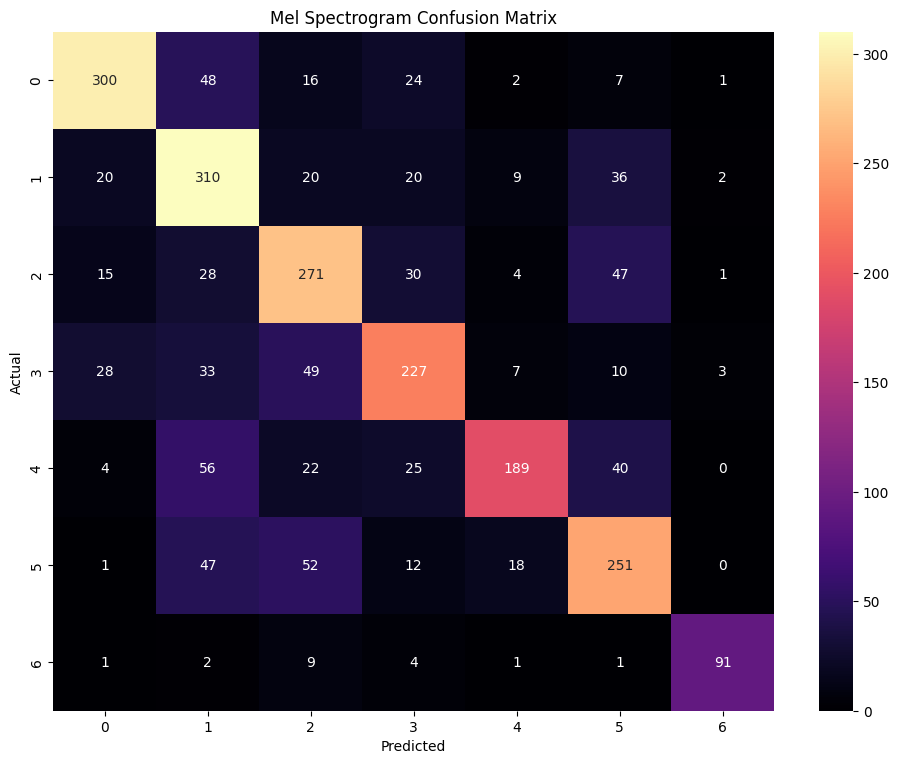

In [41]:
cm = tf.math.confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
# Make the index and column labels the emotion names
cm = pd.DataFrame(cm.numpy())
sns.heatmap(cm, annot=True, fmt='', cmap='magma')
plt.title('Mel Spectrogram Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout(pad=2)

In [24]:
import librosa
import numpy as np
def predict_emotion(file_path,model):
    y, sr = librosa.load(file_path, sr=44100)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spec = mel_spec[:, :128]
    mel_spec = np.pad(mel_spec, ((0,0),(0,max(0,128 - mel_spec.shape[1]))), mode='constant')
    librosa.display.specshow(mel_spec, y_axis='mel', x_axis='time')
    mel_spec = mel_spec[np.newaxis, ..., np.newaxis]

    pred = model.predict(mel_spec)
    emotion = np.argmax(pred,axis = 1)
    return emotion

print(predict_emotion("/content/drive/MyDrive/cremad/AudioWAV/1001_DFA_FEA_XX.wav"),mel_spec)

# CRNN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed

In [40]:
# Build a CRNN model
model_crnn = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 345, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Second convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Third convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    # Global average pooling layer averages the values in each feature map into
    # a single value and flattens the result into a (none, 256) array
    tf.keras.layers.GlobalAveragePooling2D(),
    # Reshape layer to convert (none, 256) to (none, 1, 256) as the LSTM layer
    # requires a 3D input
    tf.keras.layers.Reshape((1, 128)),
    # First bidirectional recurrent layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    # Second bidirectional recurrent layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [42]:
model_crnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10, restore_best_weights=True, mode = 'min')
lr_scheular = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,min_lr = 0.000001,mode = 'min')
histor = model_crnn.fit(train_ds,epochs = 30,validation_data = test_ds,callbacks = [early_stopping,lr_scheular])

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.3178 - loss: 1.6922 - val_accuracy: 0.2423 - val_loss: 2.3518 - learning_rate: 0.0010
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.4794 - loss: 1.3375 - val_accuracy: 0.2389 - val_loss: 2.4003 - learning_rate: 0.0010
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.5511 - loss: 1.1483 - val_accuracy: 0.3659 - val_loss: 1.7601 - learning_rate: 0.0010
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.5892 - loss: 1.0675 - val_accuracy: 0.3751 - val_loss: 1.8279 - learning_rate: 0.0010
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.6034 - loss: 1.0075 - val_accuracy: 0.4031 - val_loss: 1.6762 - learning_rate: 0.0010
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.6312 - loss: 0.9575 - val_accuracy: 0.5468 - val_loss: 1.2560 - learning_rate: 0.0010
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.6480 - l

In [43]:
model_crnn.save('/content/drive/MyDrive/model_crnn.keras')

In [5]:
import tensorflow as tf
model_crnn = tf.keras.models.load_model('/content/drive/MyDrive/model_crnn.keras')

In [21]:
y_pred = model_crnn.predict(X_test)
y_pred = np.argmax(y_pred,axis = 1)

75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       398
           1       0.68      0.67      0.68       417
           2       0.69      0.54      0.60       396
           3       0.58      0.64      0.61       357
           4       0.77      0.65      0.70       336
           5       0.61      0.68      0.64       381
           6       0.78      0.91      0.84       109

    accuracy                           0.68      2394
   macro avg       0.69      0.70      0.69      2394
weighted avg       0.68      0.68      0.68      2394



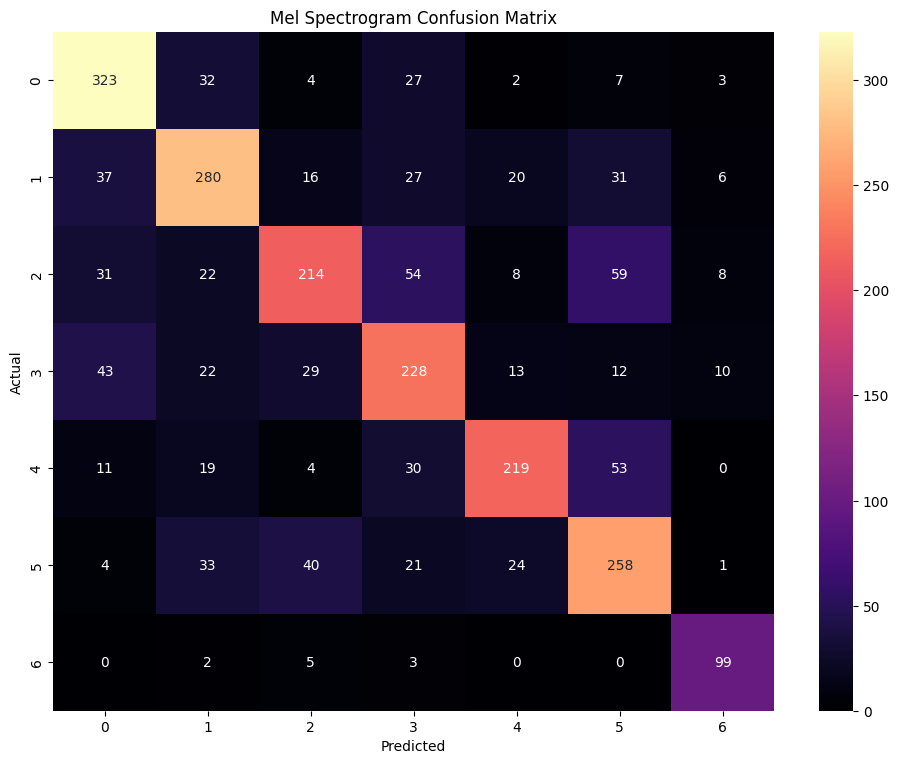

In [23]:
cm = tf.math.confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
# Make the index and column labels the emotion names
cm = pd.DataFrame(cm.numpy())
sns.heatmap(cm, annot=True, fmt='', cmap='magma')
plt.title('Mel Spectrogram Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout(pad=2)

In [30]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def predict_emotion(file_path, model):
    y, sr = librosa.load(file_path, sr=44100, duration=4)  # limit duration
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    # Ensure consistent width (345)
    if mel_spec.shape[1] < 345:
        pad_width = 345 - mel_spec.shape[1]
        mel_spec = np.pad(mel_spec, ((0,0),(0,pad_width)), mode='constant')
    else:
        mel_spec = mel_spec[:, :345]

    # Add batch and channel dimensions
    mel_spec = mel_spec[np.newaxis, ..., np.newaxis]  # shape: (1, 128, 345, 1)

    # Optional: visualize
    plt.figure(figsize=(6,3))
    librosa.display.specshow(mel_spec[0, :, :, 0], sr=sr, x_axis='time', y_axis='mel')
    plt.title("Mel-Spectrogram of Input Audio")
    plt.show()

    # Predict
    pred = model.predict(mel_spec)
    emotion = np.argmax(pred, axis=1)
    return emotion
